In [1]:
from itertools import chain
from dateutil.parser import parse
from datetime import datetime
import pandas as pd
import re
from matplotlib import pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib as mpl
import numpy as np
from collections import namedtuple


to_namedtuple = lambda x: list(x.itertuples())
df = pd.read_csv('../data/all-history-actions.csv')


In [2]:
# coerce date type from string to datetime type

for column in df: 
  if column.endswith("date"):
    df[column] = pd.to_datetime(df[column])

df['date'] = pd.DatetimeIndex(df['date']).date

In [3]:
# get action types from actions


ActionType = namedtuple('ActionType', ['action_type', 'pattern'])


amendments = ActionType('amendments', re.compile('(amendment)', re.IGNORECASE))
accompanied = ActionType('accompanied', re.compile('(accompanied).*', re.IGNORECASE))
amended = ActionType('amended', re.compile('(amended).*', re.IGNORECASE))
also_based_on = ActionType('also_based_on', re.compile('(also based on).*', re.IGNORECASE))
substituted = ActionType('substituted', re.compile('(substitute).*', re.IGNORECASE))
new_draft = ActionType('new_draft', re.compile('(new draft)', re.IGNORECASE))
text_of = ActionType('text_of', re.compile('(text of)', re.IGNORECASE))
to_committee = ActionType('to_committee', re.compile('(referred|discharged|recommitted)', re.IGNORECASE))
committee_of_conference = ActionType('committee_of_conference', re.compile('committee of (conference)', re.IGNORECASE))
reported = ActionType('reported', re.compile('(:P<reported>reported|ought)', re.IGNORECASE))
concurred = ActionType('concurred', re.compile('(.*concurred)', re.IGNORECASE))
hearing = ActionType('hearing', re.compile('(hearing)', re.IGNORECASE))
read = ActionType('read', re.compile('(read)', re.IGNORECASE))
enacted = ActionType('enacted', re.compile('(enacted)', re.IGNORECASE))
engrossed = ActionType('engrossed', re.compile('(engrossed)', re.IGNORECASE))
governor = ActionType('governor', re.compile('(governor)', re.IGNORECASE))
adopted = ActionType('adopted', re.compile('(adopted)', re.IGNORECASE))
orders_of_the_day = ActionType('orders_of_the_day', re.compile('(orders)', re.IGNORECASE))
date_extended = ActionType('date_extended', re.compile('(extended)', re.IGNORECASE))
passed = ActionType('passed', re.compile('(passed over veto)', re.IGNORECASE))
placed_on_file = ActionType('placed_on_file', re.compile('(placed on file)', re.IGNORECASE))
rules_suspended = ActionType('rules_suspended', re.compile('(rules) suspended', re.IGNORECASE))
emergency_preamble = ActionType('emergency_preamble', re.compile('(emergency)', re.IGNORECASE))
transmitted = ActionType('transmitted', re.compile('(transmitted)', re.IGNORECASE))

bill_mention = ActionType('bill_mention', re.compile('(.*)\s([HS]\d{1,5})', re.IGNORECASE))

action_types = [
  accompanied, 
  also_based_on,
  amended, 
  substituted, 
  enacted, 
  engrossed, 
  governor, 
  adopted, 
  date_extended, 
  transmitted, 
  amendments, 
  text_of,
  to_committee,
  committee_of_conference, 
  reported, 
  concurred, 
  hearing, 
  rules_suspended, 
  read, 
  orders_of_the_day, 
  emergency_preamble,
  bill_mention
  ]


def get_action_type(action): 
  for a in action_types: 
    t = a.pattern.search(action)
    if t: 
      return a.action_type


df['action_type'] = df['action'].apply(get_action_type)


In [4]:
dp = df.copy(deep = True)


In [26]:
[x for x in dp[dp['action'].str.contains(r'')]['action']]

['Referred to the committee on The Judiciary',
 'Discharged to the committee on The Judiciary',
 'Discharged to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referred to the committee on The Judiciary',
 'Referre

TypeError: object of type 'datetime.date' has no len()

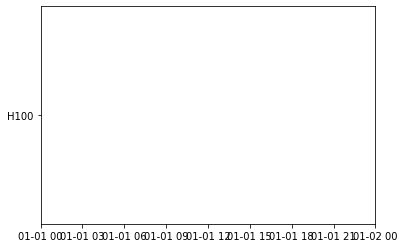

In [54]:


# dp['read'] = dp['action'].str.count(r'Read[,;]', re.IGNORECASE) > 0
# dp['second'] = dp['action'].str.count(r'read second', re.IGNORECASE) > 0
# dp['third']= dp['action'].str.count(r'third', re.IGNORECASE) > 0


# dp['second'] = dp['action'].str.count(r'second', re.IGNORECASE) > 0
# dp['third'] = dp['action'].str.count(r'Third .*(?!reading)', re.IGNORECASE) > 0
# print(dp.groupby(['read', 'second', 'third']).count())


# print(dp[dp['read']][['read', 'second', 'third']])
dp['second'] = dp.action.str.contains(r'[R|r]ead second')
dp['third'] = dp.action.str.contains(r'[R|r]ead third')

# dp_read = dp[dp['read']]
# dp_second = dp[dp.action.str.contains(r'[R|r]ead second')]
# dp_third = dp[dp.action.str.contains(r'[R|r]ead third')]

dps = dp[dp['second']].copy(deep=True)
dpt = dp[dp['third']].copy(deep=True)

dpst = pd.concat([dps, dpt])

dpst.sort_values(by=['id', 'date'])
dpstg = dpst.groupby(['id'], as_index=True)

    
for i in dpst['id'].unique():
    grp = dpstg.get_group(i)
    x = (grp.date.min(), grp.date.max() - grp.date.min())
    y = [i] * len(grp.values)
    plt.broken_barh(x, y)

KeyError: 'order_dates'

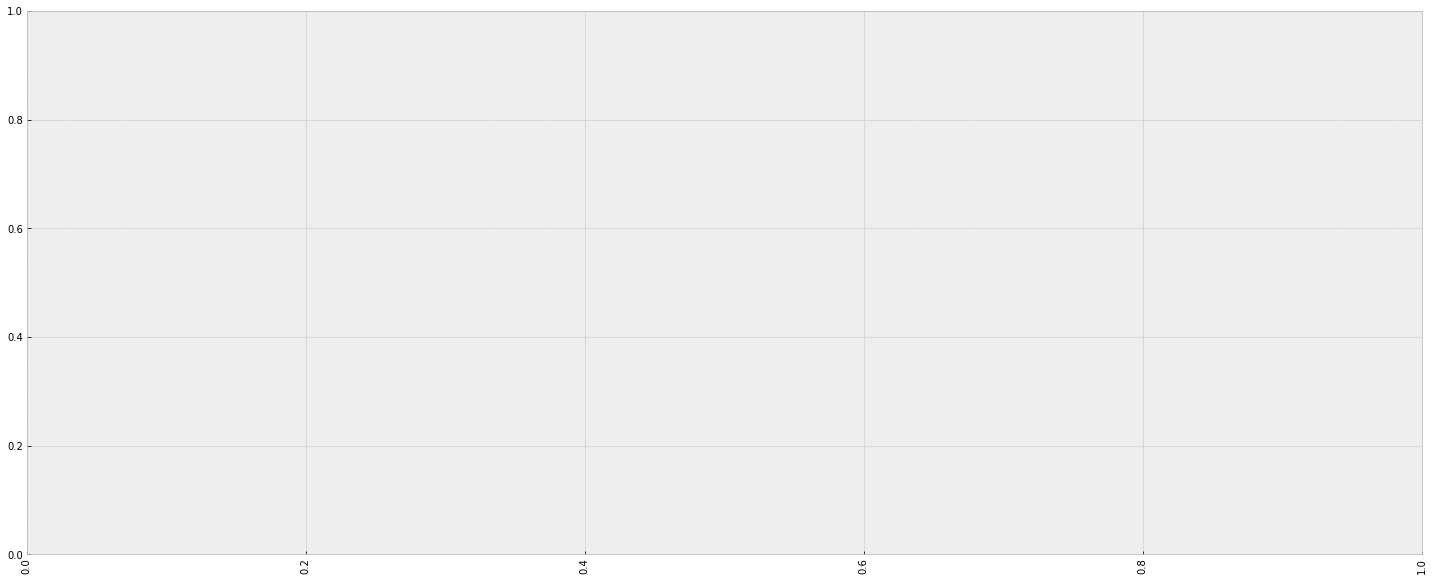

In [57]:
# visualize time between ordered to reading and reading


id_colors = {id : i % 20 for i, id in enumerate(df.id.unique())}
action_colors = {act : i for i, act in enumerate(df.action_type.unique())}

df['ucolorid'] = df['id'].apply(lambda x : id_colors[x])
df['action_color'] = df['action_type'].apply(lambda x : action_colors[x])



df_o = df[df['action_type'] == 'orders_of_the_day']
x=df_o.id
y=df_o.date
ats=df_o.action_type


df_a = df[df['action_type'] == 'read']
xa=df_a.id
ya=df_a.date
atsa=df_a.action_type



cmap = mpl.colormaps["tab20"]


idcolors_o = cmap(df_o.ucolorid)
colors_o = cmap(df_o.action_color)
                 

idcolors_a = cmap(df_a.ucolorid)
colors_a = cmap(df_a.action_color)
                 
                
plt.style.use('bmh')
fig, ax = plt.subplots()
plt.xticks(rotation=90)
fig.set_figheight(10)
fig.set_figwidth(25)


value_array = np.random.rand(100, 3)

c=value_array


orders_dates = df[(df['action_type'] == 'orders_of_the_day') | (df['action_type'] == 'read')].groupby('id', as_index=True).min()
read_dates = df[df['action_type'] == 'read'].groupby('id', as_index=True).max()

orders_dates['order_dates'] = orders_dates['dates']
read_dates['read_dates'] = read_dates['date']

conc = pd.concat([orders_dates, read_dates])



print(conc)


  # bb = plt.broken_barh(xranges=x, yrange=(i[0] - .4, 0.8), facecolors=c)

# ax.scatter(x, y, s=200, c=idcolors_o , marker='^')
# ax.scatter(xa, ya, s=200, c=idcolors_a , marker='s')

# grps = df_o.groupby('id')


# for i in grps.groups:
#   g = grps.get_group(i)
#   x1 = g['id']
#   y1 = g['date']
#   gcolor = cmap(g['ucolorid'])
  
#   ax.plot(x1, y1, c=gcolor)


[]

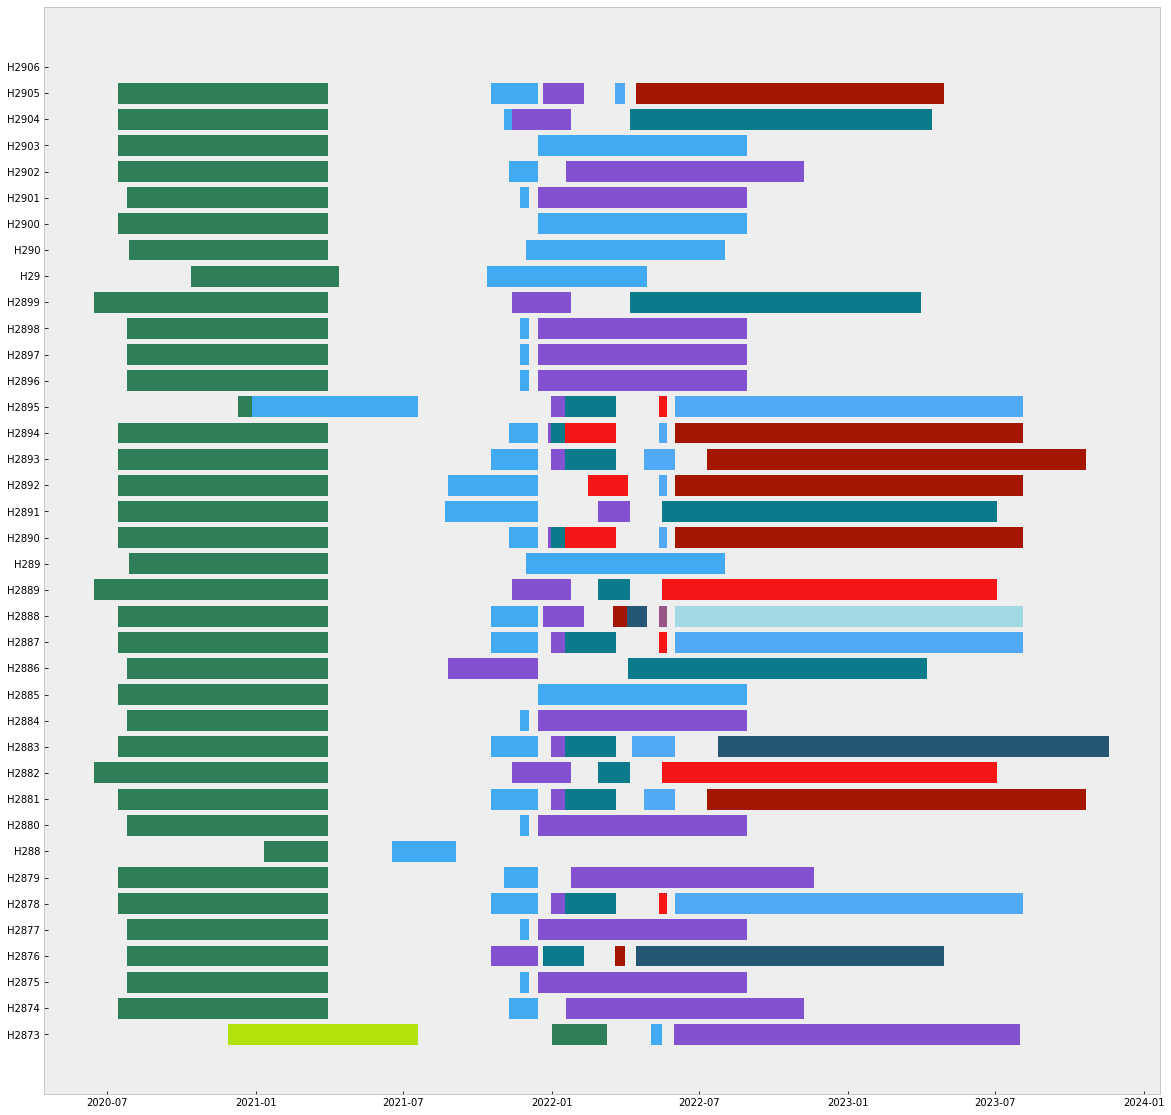

In [ ]:
# visualize time between statuses


plt.style.use('bmh')
date_shifted = df.date.shift(-1)

df['duration'] = df.date - date_shifted

dft = df.iloc[10000:10200]

dftg = dft.groupby('id')

plt.figure(figsize=[20,20])

# np.random.seed(1234)
value_array = np.random.rand(100, 3)

c=value_array



for index, d in enumerate(dftg.groups): 
  i = dftg.get_group(d)
  dates = i.date.to_list()
  durs = i.duration.to_list()
  labels = i.action_type.to_list()
  array = []
  for r in range(len(dates)): 
    array.append((dates[r], durs[r]))
  bb = plt.broken_barh(xranges=array, yrange=(index - .4, 0.8), facecolors=c)
  
  
  


plt.grid(False)
plt.yticks(np.arange(0, len(dftg.groups), step=1), labels=dftg.groups)


plt.plot()



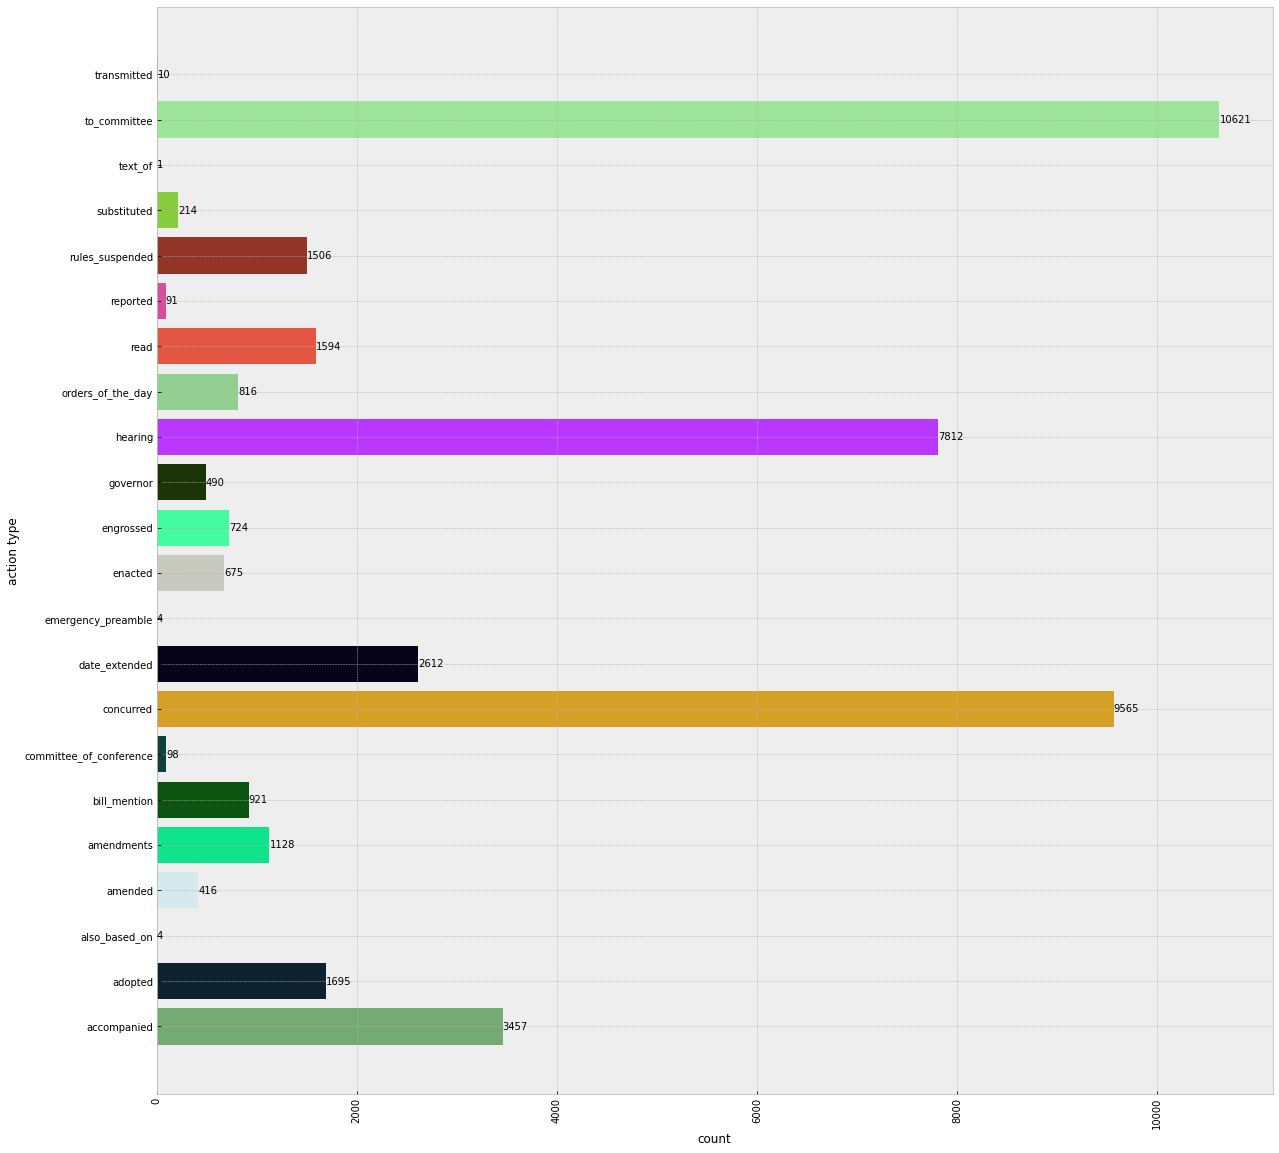

In [ ]:


dg = df.groupby(['action_type']).count()

dg.sort_values(by='action_type')

c=np.random.rand(len(dg.index), 3)
bar_labels = dg.index



plt.style.use('bmh')
plt.figure(figsize=[20,20])
plt.xticks(rotation='vertical')
p1 = plt.barh(dg.index, dg.id, color=c)
plt.bar_label(p1)
plt.xlabel("count")
plt.ylabel("action type")
plt.show()
